In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Conv1D
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('prices-split-adjusted.csv')
pg = df[df['symbol'] == 'HAL']

In [3]:
pg.drop('open', axis = 1,  inplace=True)
pg.drop('low', axis = 1,  inplace=True)
pg.drop('high', axis = 1,  inplace=True)
pg.drop('symbol', axis = 1,  inplace=True)
pg.drop('volume', axis = 1,  inplace=True)

/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
def EMA(DF,a):
    df = DF.copy()
    df["EMA"]=df["close"].ewm(span=a,min_periods=a).mean() # ewm is Exponential Moving Average 
    df.dropna(inplace=True)
    return df

In [5]:
pg = EMA(pg, 8) 
# you can choose your own look back period, I've taken 8 here, generally we take 12 and 26 for MACD calculation  
pg

,date,close,EMA
3724,2010-01-13,34.049999,33.336927
4192,2010-01-14,34.310001,33.578308
4660,2010-01-15,34.029999,33.687532
5128,2010-01-19,34.599998,33.903938
5596,2010-01-20,33.270000,33.755803
...,...,...,...
848972,2016-12-23,54.840000,54.359605
849472,2016-12-27,54.910000,54.481915
849972,2016-12-28,54.299999,54.441489
850472,2016-12-29,54.040001,54.352270


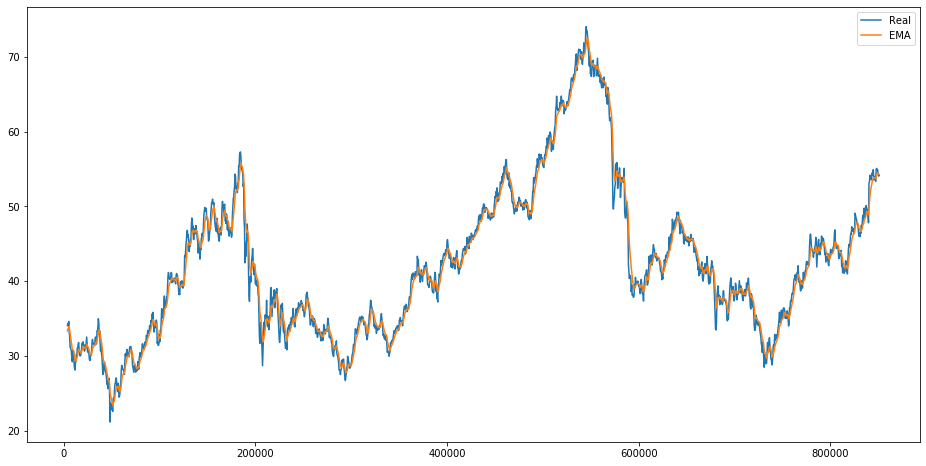

In [6]:
plt.figure(figsize=(16,8))
plt.plot(pg['close'])
plt.plot(pg['EMA'])
plt.legend(['Real', 'EMA'])

In [7]:
close = pg['close']
close = pd.DataFrame(data=close)

In [8]:
pg.drop('date', axis = 1,  inplace=True)
pg.drop('close', axis = 1,  inplace=True)

In [9]:
dataset = pg.values
train = dataset[0:1500,:]
valid = dataset[1500:,:]

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [11]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [12]:
model = Sequential()
model.add(Dense(20,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Conv1D(filters=32, kernel_size=3,strides=1, padding="causal", activation="relu", input_shape=[None, 1]))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dense(1))

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
history = model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1, validation_split = 0.15)

Train on 1224 samples, validate on 216 samples
Epoch 1/100
1224/1224 [==============================] - 6s 5ms/step - loss: 0.1080 - mae: 0.2393 - val_loss: 0.0382 - val_mae: 0.1894
Epoch 2/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.0219 - mae: 0.1235 - val_loss: 0.0025 - val_mae: 0.0414
Epoch 3/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.0128 - mae: 0.0857 - val_loss: 0.0021 - val_mae: 0.0384
Epoch 4/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.0064 - mae: 0.0605 - val_loss: 0.0056 - val_mae: 0.0653
Epoch 5/100
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0048 - mae: 0.0516 - val_loss: 0.0015 - val_mae: 0.0305
Epoch 6/100
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0038 - mae: 0.0459 - val_loss: 0.0021 - val_mae: 0.0382
Epoch 7/100
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0031 - mae: 0.0402 - val_loss: 9.5872e-04 - val_mae: 0.0237
Epoc

1224/1224 [==============================] - 2s 2ms/step - loss: 1.6693e-04 - mae: 0.0094 - val_loss: 1.0273e-04 - val_mae: 0.0077
Epoch 59/100
1224/1224 [==============================] - 2s 2ms/step - loss: 1.6169e-04 - mae: 0.0093 - val_loss: 1.0672e-04 - val_mae: 0.0077
Epoch 60/100
1224/1224 [==============================] - 2s 2ms/step - loss: 1.5863e-04 - mae: 0.0092 - val_loss: 1.0246e-04 - val_mae: 0.0076
Epoch 61/100
1224/1224 [==============================] - 2s 2ms/step - loss: 1.5018e-04 - mae: 0.0090 - val_loss: 1.1002e-04 - val_mae: 0.0079
Epoch 62/100
1224/1224 [==============================] - 2s 2ms/step - loss: 1.5095e-04 - mae: 0.0089 - val_loss: 9.8433e-05 - val_mae: 0.0074
Epoch 63/100
1224/1224 [==============================] - 2s 2ms/step - loss: 1.4722e-04 - mae: 0.0089 - val_loss: 9.1737e-05 - val_mae: 0.0072
Epoch 64/100
1224/1224 [==============================] - 2s 2ms/step - loss: 1.4215e-04 - mae: 0.0087 - val_loss: 9.0606e-05 - val_mae: 0.0072
Epoch

In [14]:
inputs = pg[len(pg) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [15]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [16]:
f = close[1500:].values

#### root mean squared error with actual values

In [17]:
rms=np.sqrt(np.mean(np.power((f-closing_price),2)))
rms

1.2981479011201968

#### root mean squared error with EMA values

In [18]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.3460917221293356

#### mean absolute error with actual values

In [19]:
mae=(np.mean(abs(f-closing_price)))
mae

1.0518537534610521

#### mean absolute error with EMA values

In [20]:
mae=(np.mean(abs(valid-closing_price)))
mae

0.2761113997916873

/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


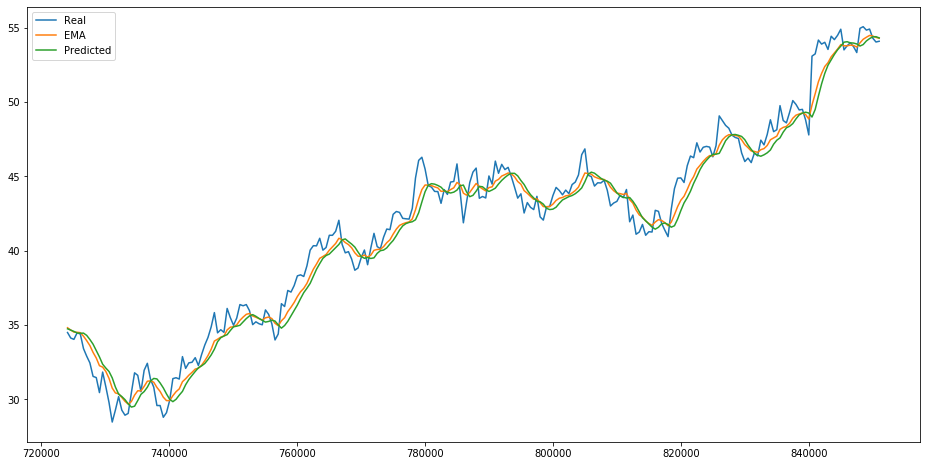

In [21]:
train = pg[:1500]
valid = pg[1500:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(close['close'][1500:])
plt.plot(valid[['EMA','Predictions']])
plt.legend(['Real', 'EMA', 'Predicted'])

In [22]:
s = pg[len(pg) - 60:].values
s = s.reshape(-1,1)
s = scaler.transform(s)

In [23]:
s = np.reshape(s, (s.shape[1],s.shape[0],1))
closing_price = model.predict(s)
closing_price = scaler.inverse_transform(closing_price)
closing_price # next day closing price

array([[54.233]], dtype=float32)